# Project: Heart Attack Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> ### Dataset Description 

> I will go through heart attack data, this data has the following attributes:
- Age : Age of the patient (Real value)
- Sex : Sex of the patient (Binary 1 = male; 0 = female)
- cp : Chest Pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- trtbps : Resting blood pressure (in mmHg)
- chol : Cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg : Resting electrocardiographic is a test that measures the electrical activity of the heart. results:
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak : Previous peak = ST depression induced by exercise relative to rest (0-6.2)(‘ST’ relates to positions on the ECG plot.)
- slp : The slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping
- caa: Number of major vessels (0-3)
- thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
    - Value 1: fixed defect (no blood flow in some part of the heart)
    - Value 2: normal blood flow
    - Value 3: reversible defect (a blood flow is observed but it is not normal)
- output : 0= less chance of heart attack; 1= more chance of heart attack


> ### Question(s) for Analysis
- What are common symptoms in asymptomatic chest pain type patients having Heart Attack?
- What is the relation between the slope shape of the ST-segment and heart attack patients?
- 
- 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
rc_dic={'figure.figsize':(12,8),'font.size':20,'figure.titlesize':'medium','legend.fontsize':'small'}
sns.set(rc=rc_dic,style='ticks')

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:
df = pd.read_csv('heart.csv') # Loading the data
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trtbps      303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
slp         303 non-null int64
caa         303 non-null int64
thall       303 non-null int64
output      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


>- The data is clean just the column names needs more explanation.
>- The data is small just 330 record and 14 attribute.
>- Most of our data are male.

### Data Cleaning

Renaming columns to make visualization titles understandable

In [6]:
df.rename(columns = {'age':'Age',
                     'sex':'Sex',
                     'cp':'ChestPainType',
                     'trtbps':'RestingBP',
                     'chol':'Cholestoral',
                     'fbs':'FastingBS',
                     'restecg':'RestingECG',
                     'thalachh':'MaxHR',
                     'exng':'ExerciseAngina',
                     'oldpeak':'OldPeak',
                     'slp':'ST_Slope',
                     'thall': 'BloodDisorder',
                     'caa':'NumberOfDamagedVessels',
                     'output':'HeartAttack'}, inplace=True)

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholestoral,FastingBS,RestingECG,MaxHR,ExerciseAngina,OldPeak,ST_Slope,NumberOfDamagedVessels,BloodDisorder,HeartAttack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Checking for duplicates.

In [8]:
df.duplicated().sum()

1

and droping them..

In [9]:
df.drop_duplicates(inplace=True)

Renaming `HeartAttack` column values for a better detailed visualizations.

In [10]:
df.loc[df['HeartAttack']==0, 'HeartAttack'] = 'No'
df.loc[df['HeartAttack']==1, 'HeartAttack'] = 'Yes'

>- The Data is clean and ready to be visualized.

<a id='eda'></a>
## Exploratory Data Analysis


## Research Question 1 
### What are common symptoms in asymptomatic chest pain type patients having Heart Attack?

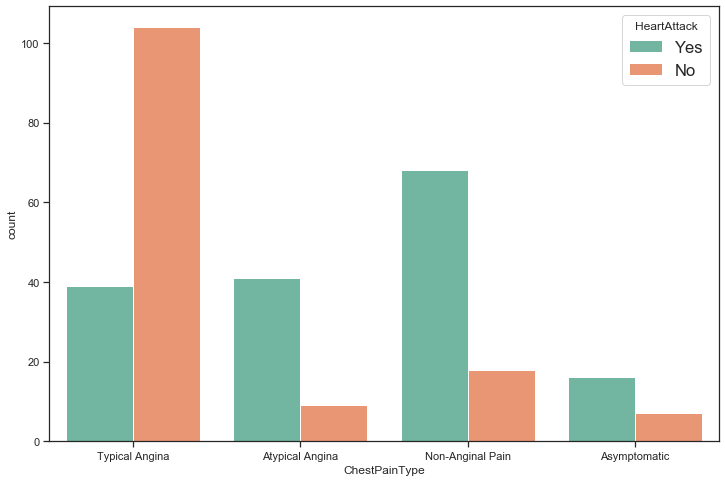

In [11]:
sns.countplot(data=df, x='ChestPainType', hue='HeartAttack',hue_order=['Yes', 'No'] , palette = "Set2")
plt.xticks([0,1,2,3], ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']);

> Patients with Typical Angina pain type most of times don't suffer a heart attack unlik Atypical angina and Non-anginal pain types 

#### Now Let's get a closer look at those asymptomatic patients

In [12]:
df1 = df[(df['ChestPainType']==3) & (df['HeartAttack']=='Yes')]

In [13]:
def comparison(col):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    sns.histplot(df[col], ax=ax[0])
    sns.histplot(df1[col], ax=ax[1])

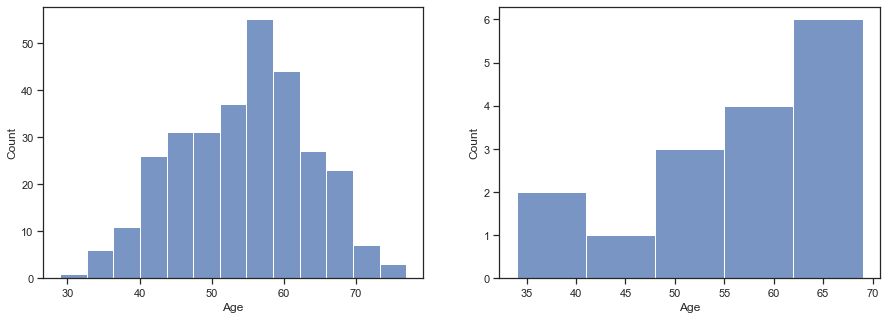

In [14]:
comparison('Age')

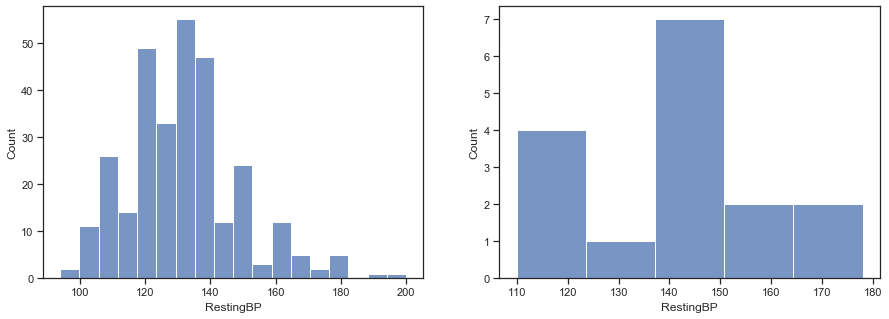

In [15]:
comparison('RestingBP')

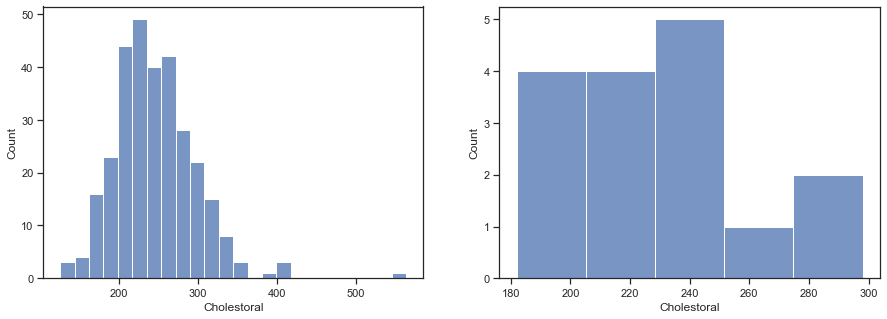

In [16]:
comparison('Cholestoral')

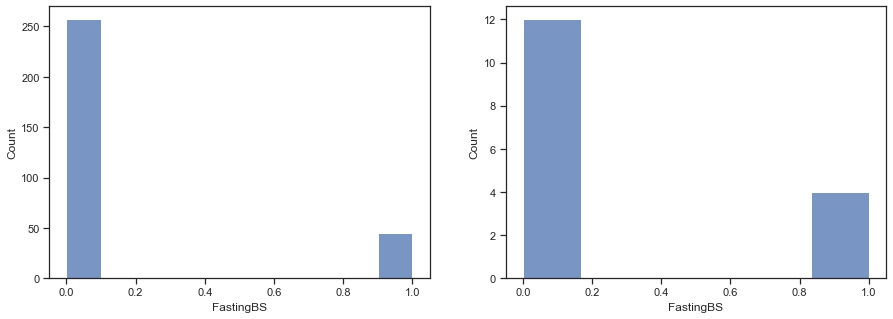

In [17]:
comparison('FastingBS')

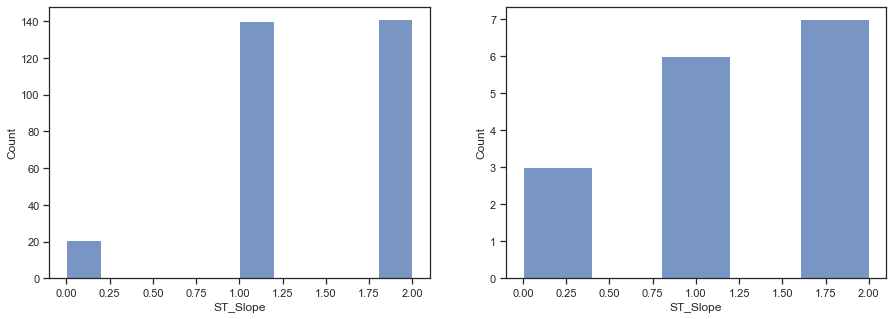

In [18]:
comparison('ST_Slope')

> By comparing the distrbutions in the full data and the data of asymptomatic chest pain type patients having Heart Attack I found that There is common symptoms that are different from the original data:
- They are older than the mean of the original data
- They tend to have higher blood presure 
- The have more of upsloping and downsloping in `ST_Slope` column than usual which referes to a problem.
- There is no big diferrence in Blood sugar, Cholestoral level and other attributes.

## Research Question 2
### What is the relation between the slope shape of the ST-segment and heart attack patients?

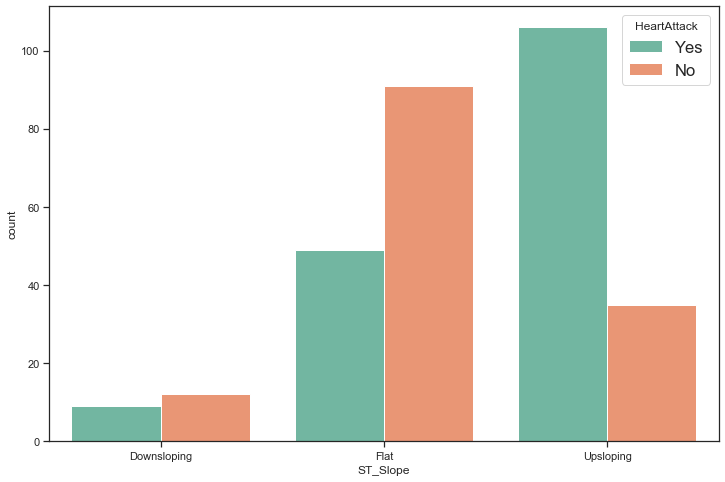

In [19]:
sns.countplot(data=df, x='ST_Slope', hue='HeartAttack',hue_order=['Yes', 'No'] , palette = "Set2")
plt.xticks([0,1,2], ['Downsloping', 'Flat', 'Upsloping']);

>- In `Downsloping` ST slope case we can opserve that people who didn't experience heart attack are a little bit more but the data are really small and we can't give a clear insightful information from that.
>- Patients with `Flat` ST slope which represents the normal case are some kind normal mostly didn't had a Heart Attack.
>- The ones with `Upsloping` ST slope tend to have a heart attack and that seems to be a problem that really causes heart attack.

<a id='conclusions'></a>
## Conclusions

> **Conclusions**: 
- The data is really isightful that we can say that people with Uplosping `St_slope` and not of Typical angina `Chest Pain Type` are really the highest rate of getting a Heart Attack.
- On the other hand the Flat `St_slope` and Typical angina `Chest Pain Type` are the lowest rate of getting a Heart Attack.

> **Limitations**: 
- The data is rich and clean but it was too small.
- The data from male is more than female.
- The description of the data isn't really helpful and took really much effort to explore the columns.
- There is no column that shows if they just broke up with their partner or not.